# Explore here

In [871]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import *
from pickle import dump

In [872]:
### DATA ANALYSIS FOR CALIFORNIA HOUSING
### CLASSIFY HOUSES ACCORDING TO THEIR REGION AND MEDIAN INCOME
# Get California Housing dataset
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

In [873]:
# Print the first rows of the dataframe for visualization
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [874]:
# Shape of the dataframe
df.shape

(20640, 9)

In [875]:
df.head().T

,0,1,2,3,4
MedInc,8.325200,8.301400,7.257400,5.643100,3.846200
HouseAge,41.000000,21.000000,52.000000,52.000000,52.000000
AveRooms,6.984127,6.238137,8.288136,5.817352,6.281853
AveBedrms,1.023810,0.971880,1.073446,1.073059,1.081081
Population,322.000000,2401.000000,496.000000,558.000000,565.000000
AveOccup,2.555556,2.109842,2.802260,2.547945,2.181467
Latitude,37.880000,37.860000,37.850000,37.850000,37.850000
Longitude,-122.230000,-122.220000,-122.240000,-122.250000,-122.250000
MedHouseVal,4.526000,3.585000,3.521000,3.413000,3.422000


In [876]:
# Summary of the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [877]:
# Start Exploratory data analysis (EDA)

# Count the number of unique values in the dataframe
df.nunique()

MedInc         12928
HouseAge          52
AveRooms       19392
AveBedrms      14233
Population      3888
AveOccup       18841
Latitude         862
Longitude        844
MedHouseVal     3842
dtype: int64

In [878]:
# Check if duplicates
print(f"Duplicate values: {df.duplicated().sum():.2f}")

Duplicate values: 0.00


There are no duplicate values in the dataframe.

In [879]:
# Check if there are more than one row with the same latitude and longitude
index1 = np.where(df['Latitude'] == df['Longitude'])[0]
print(f"Rows with the same Latitude and Longitude: {df.iloc[index1]}")

Rows with the same Latitude and Longitude: Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal]
Index: []


The block groups are not duplicate.

In [880]:
# Check the lines with at least one isnull value
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

There are no isnull values in the dataframe.

In [881]:
# Description of the numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


The relevant data for this analysis are: MedInc, Latitude and Longitude.

MedInc (median income in block group in hundreds of thousands of dollars, $100,000))
  - The minimum median income is 0.49 and the maximum 15 with a mean of 3.8.
  - The 50% or mode value (3.53) is lower than mean (3.86), there is a positive skew and there are more lower MedInc than higher ones.

Latitude (block group latitude)
  - The minimum latitude is 32.54 and the maximum 41.95.

Longitude (block group longitude)
  - The minimum longitude is -124.35 and the maximum is -114.31.

The block groups are in United States according to the latitude and longitude values.

In [882]:
# Select the following columns in the dataframe: MedInc, Latitude, Longitude
X = df[["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

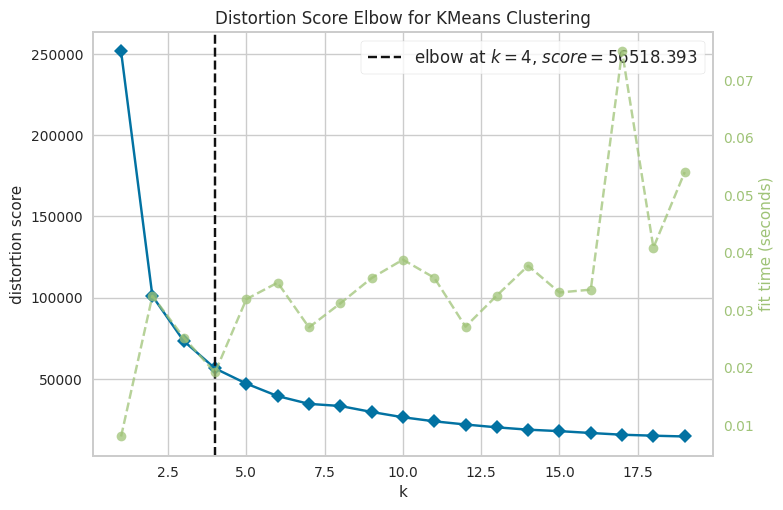

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [883]:
# ELBOW METHOD TO DEFINE THE NUMBER OF CLUSTERS FOR KMEANS MODEL
elbow_vis = KElbowVisualizer(KMeans(random_state=42), k=(1, 20))
elbow_vis.fit(X)
elbow_vis.show()

According to the Elbow Method, the optimal number of clusters for this data analysis is 4.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

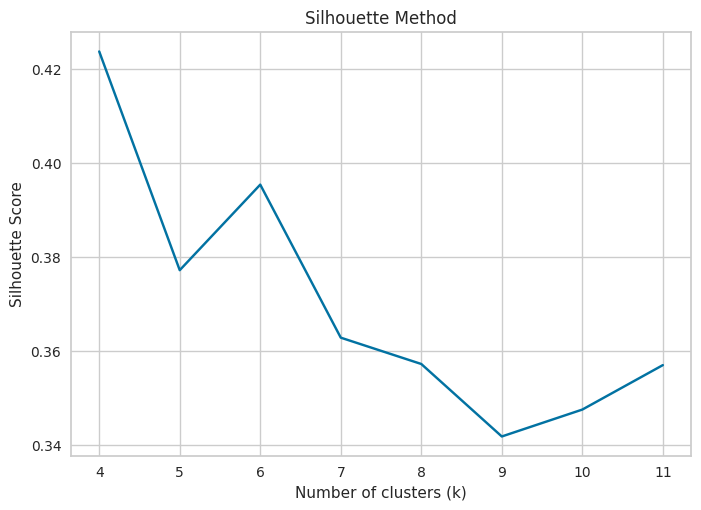

In [884]:
# SILHOUETTE METHOD TO DEFINE THE NUMBER OF CLUSTERS FOR KMEANS MODEL
# Define the range of number of clusters to model
k_values = range(4, 12)

# Create a list for the silhouette scores for each number of clusters
silhouette_scores = []

# KMeans model with different k values
for k in k_values:
  cluster_labels = KMeans(n_clusters=k, random_state=42).fit_predict(X)
  silhouette_scores.append(silhouette_score(X, cluster_labels))

# Plot the silhouette scores for each number of clusters
plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

According to the Silhouette Method, the optimal number of clusters for this data analysis is 9.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

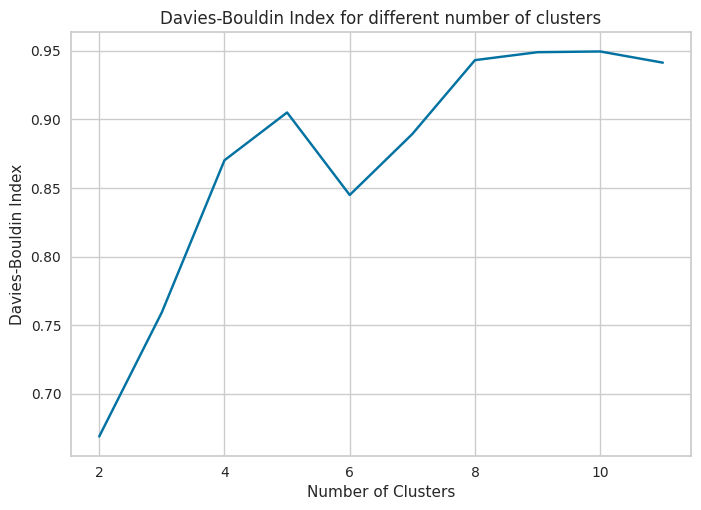

In [885]:
# DAVIES-BOULDIN INDEX TO DEFINE THE NUMBER OF CLUSTERS FOR KMEANS MODEL
# Define the range of number of clusters to model
num_clusters = range(2, 12)
db_scores = []

# KMeans model with different k values
for k in num_clusters:
    cluster_labels = KMeans(n_clusters=k, random_state=42).fit_predict(X)
    db_scores.append(davies_bouldin_score(X, cluster_labels))

# Plot the Davies-Bouldin Index for each number of clusters
plt.plot(num_clusters, db_scores)
plt.title('Davies-Bouldin Index for different number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

According to the Davies-Bouldin Index, the optimal number of clusters for this data analysis is 9.

In [886]:
# Train/test split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)
X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [887]:
X_train.shape

(16512, 3)

In [888]:
# Create KMeans model with 6 clusters
kmeans_model = KMeans(n_clusters=6, random_state=42)

# Fit the model to the data
kmeans_model.fit(X_train)

# Get the cluster centers
centers = kmeans_model.cluster_centers_
print("Cluster Centers:\n", centers)

Cluster Centers:
 [[   5.37914949   37.68747253 -121.91549044]
 [   4.34929638   33.88940929 -118.00301129]
 [   6.94251551   33.84943618 -118.04112764]
 [   2.42859805   34.04157015 -118.02425727]
 [  11.74873415   35.87817073 -120.28422764]
 [   2.73992841   38.14364263 -121.62299724]]


In [889]:
# Get the cluster for X_train block groups
labels_train = kmeans_model.labels_
print("Clusters for X_train:\n", labels)

Clusters for X_train:
 [3 1 1 ... 3 0 5]


In [890]:
print(type(labels_train))

<class 'numpy.ndarray'>


In [891]:
print(labels_train.size)

16512


In [892]:
print(np.unique(labels_train))

[0 1 2 3 4 5]


In [893]:
y_train= labels_train
y_train

array([3, 1, 1, ..., 3, 0, 5], shape=(16512,), dtype=int32)

In [894]:
X_train.insert(3, 'cluster', labels_train)
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

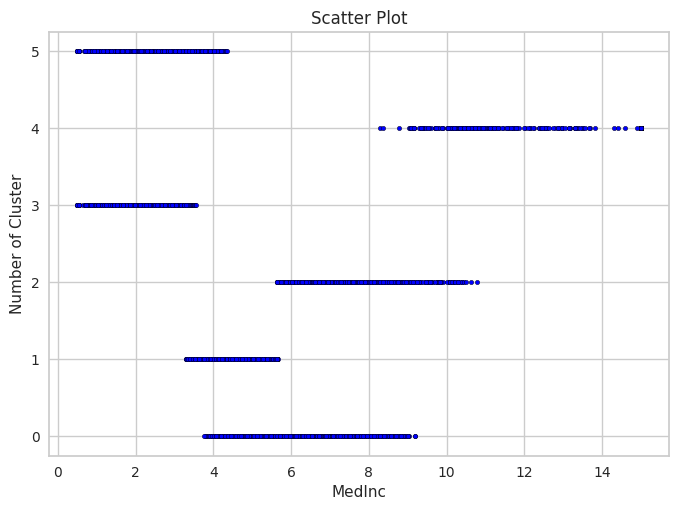

In [895]:
# Scatter plot
plt.scatter(X_train["MedInc"], X_train["cluster"], color='blue', marker='o', s=10, edgecolor='black')
plt.title('Scatter Plot')
plt.xlabel('MedInc')
plt.ylabel('Number of Cluster')
plt.grid(True)
plt.show()


The clusters 3 and 5 have the lower MedInc (median income).

The cluster 4 has the highest MedInc.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

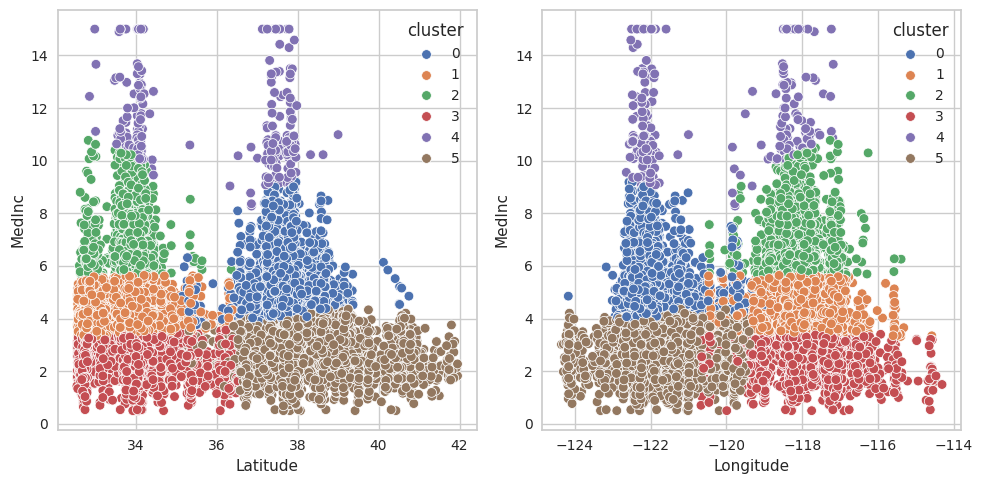

In [896]:
# Plot the train data
fig, axis = plt.subplots(1,2, figsize = (10, 5))
sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.tight_layout()
plt.show()


In [897]:
# Predict the test data
y_pred = list(kmeans_model.predict(X_test))
y_test=y_pred
X_test.insert(3, 'cluster', y_pred)
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

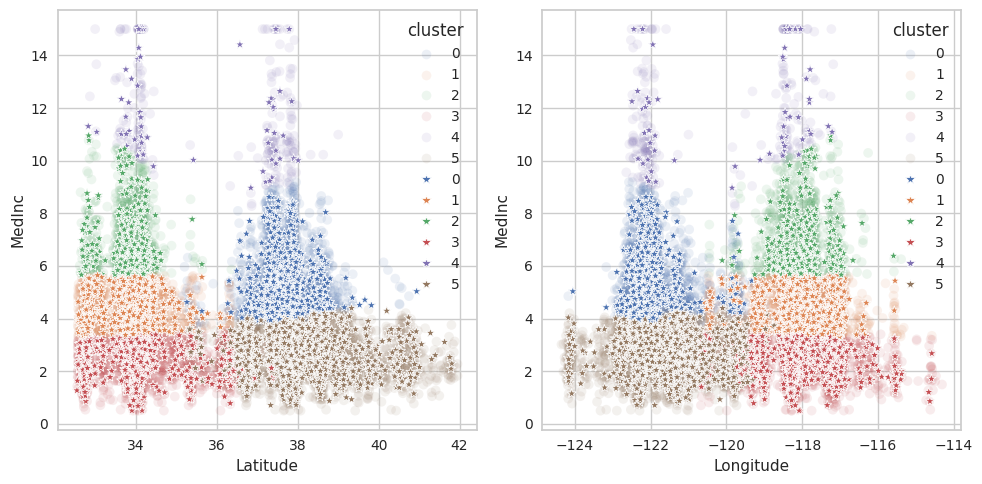

In [898]:
# Plot the train and the predicted data
fig, axis = plt.subplots(1,2, figsize = (10, 5))
sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "*")
sns.scatterplot(ax = axis[1], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "*")
plt.tight_layout()
plt.show()

Graphically, the predictions are good because the predicted points are plotted generally in the area of their color.

Next step is to train a supervised classification model.

The chosen model is a Decision Tree because the data are simple, only 3 features.

The number of the cluster will be predicted with MedInc (median income in block group), Latitude and Longitude.

In [899]:
# TRAIN A SUPERVISED CLASSIFICATION MODEL
# Create a Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
# Train the model with the train data and make predictions with the test data
train_pred = tree_model.predict(X_train)
test_pred = tree_model.predict(X_test)


In [900]:
# Accuracy of the Decision Tree model
print(f"The accuracy of the Decision Tree model is: {accuracy_score(y_test, test_pred)}")

The accuracy of the Decision Tree model is: 1.0


In [901]:
# Text representation of the Decision Tree model
text_representation = export_text(tree_model, feature_names=list(X_train.columns))
print(text_representation)

|--- cluster <= 4.50
|   |--- MedInc <= 3.39
|   |   |--- cluster <= 2.00
|   |   |   |--- class: 1
|   |   |--- cluster >  2.00
|   |   |   |--- class: 3
|   |--- MedInc >  3.39
|   |   |--- cluster <= 0.50
|   |   |   |--- class: 0
|   |   |--- cluster >  0.50
|   |   |   |--- cluster <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- cluster >  1.50
|   |   |   |   |--- cluster <= 2.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- cluster >  2.50
|   |   |   |   |   |--- cluster <= 3.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- cluster >  3.50
|   |   |   |   |   |   |--- class: 4
|--- cluster >  4.50
|   |--- class: 5



findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

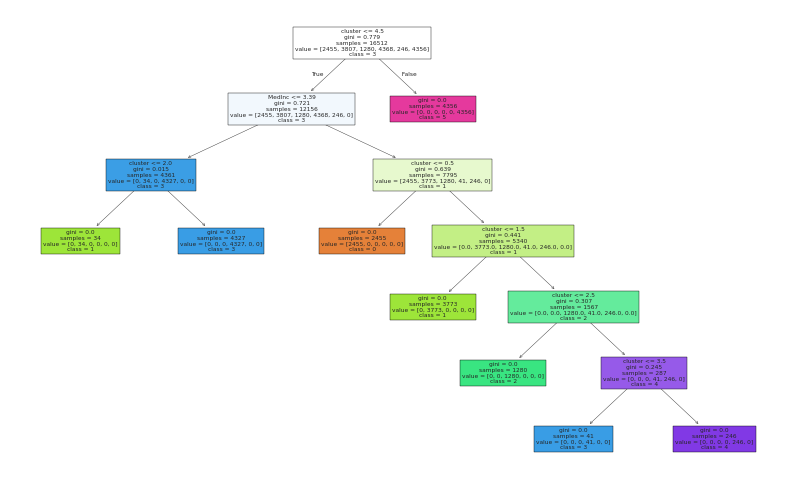

In [902]:
# Graphical representation of the Decision Tree model
plt.figure(figsize=(10, 6))
plot_tree(tree_model, feature_names=X_train.columns, class_names=['0','1','2','3','4','5'], filled=True)
plt.show()

In [903]:
# Save the KMeans model
dump(kmeans_model, open("../models/kmeans_default_42.sav", "wb"))
# Save the Decision Tree model
dump(tree_model, open("../models/tree_default_42.sav", "wb"))